In [37]:
import pandas as pd 
import numpy as np

* bwt: baby's weight in ounces at birth
* gestation: duration of pregnancy in days
* parity: parity indicator (first born = 1, later birth = 0)
* age: mother's age in years
* height: mother's height in inches
* weight: mother's weight in pounds (during pregnancy)
* smoke: indicator for whether mother smokes (1=yes, 0=no)

In [38]:
df.weight.mean()

128.4787052810903

In [39]:
df.height.mean()/12

5.337450312322544

In [40]:
df = pd.read_csv("http://people.reed.edu/~jones/141/Bwt.dat")

In [41]:
df

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0
...,...,...,...,...,...,...,...
1169,113,275,1,27,60,100,0
1170,128,265,0,24,67,120,0
1171,130,291,0,30,65,150,1
1172,125,281,1,21,65,110,0


In [42]:
import matplotlib.pyplot as plt

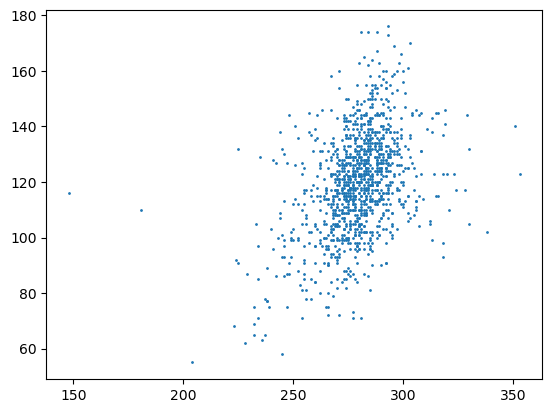

In [43]:
plt.scatter(df.gestation, df.bwt, s= 1)
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
df.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

In [46]:
model = LinearRegression()
model.fit(df.iloc[:, 1:], df.iloc[:,0])

LinearRegression()

In [47]:
df.iloc[:, 1:]

,gestation,parity,age,height,weight,smoke
0,284,0,27,62,100,0
1,282,0,33,64,135,0
2,279,0,28,64,115,1
3,282,0,23,67,125,1
4,286,0,25,62,93,0
...,...,...,...,...,...,...
1169,275,1,27,60,100,0
1170,265,0,24,67,120,0
1171,291,0,30,65,150,1
1172,281,1,21,65,110,0


In [48]:
predictions = model.predict(df.iloc[:, 1:])

In [49]:
from sklearn.metrics import root_mean_squared_error

In [50]:
root_mean_squared_error(df.bwt, predictions)

15.781980633658186

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
model2 = RandomForestRegressor()

In [53]:
model2.fit(df.iloc[:, 1:], df.iloc[:,0])
predictions2 = model2.predict(df.iloc[:, 1:])
root_mean_squared_error(df.bwt, predictions2)

6.20370869870585

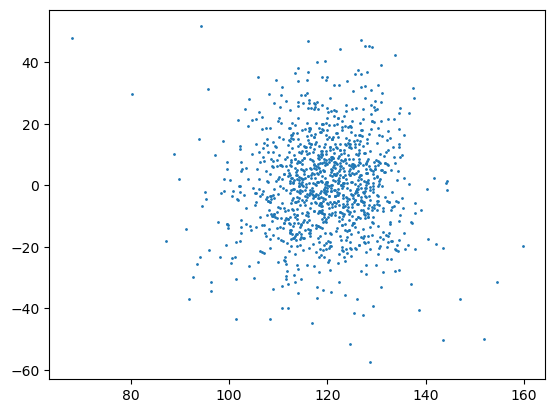

In [54]:
plt.scatter(predictions, df.bwt - predictions, s = 1)
plt.show()

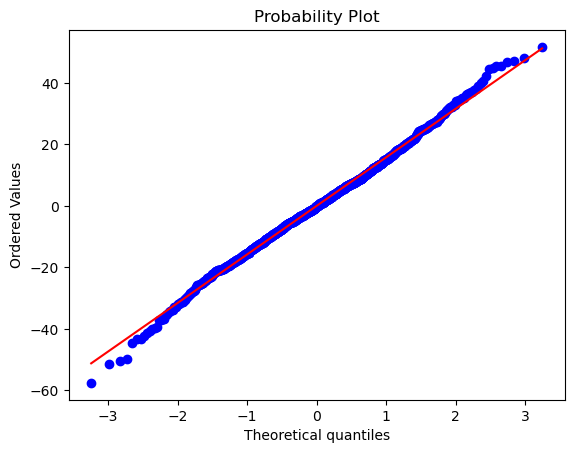

In [55]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df.bwt - predictions, dist="norm", plot=pylab)
pylab.show()

In [56]:
np.sqrt(((df.bwt - predictions)**2).mean())

15.781980633658186

In [57]:
import statsmodels.api as sm
model3 = sm.OLS(df.bwt, df.iloc[:,2:]).fit()

In [58]:
root_mean_squared_error(df.bwt, model3.predict(df.iloc[:,2:]))

17.32762938729904

In [59]:
from sklearn.kernel_ridge import KernelRidge
model4 = KernelRidge(kernel='rbf', gamma= 0.001)
model4.fit(df[['gestation']], df.bwt)

KernelRidge(gamma=0.001, kernel='rbf')

/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024_new/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


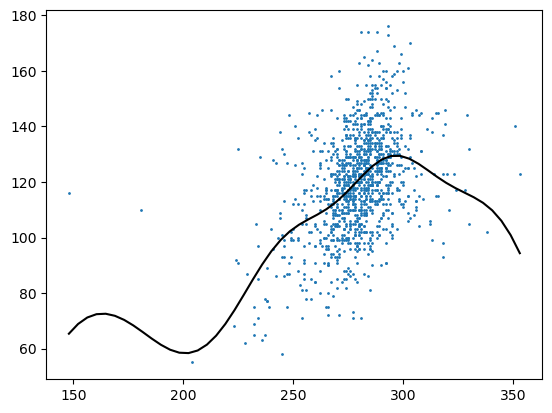

In [60]:
plt.scatter(df.gestation, df.bwt, s = 1)
plt.plot(np.linspace(df.gestation.min(), df.gestation.max()), model4.predict(np.linspace(df.gestation.min(), df.gestation.max()).reshape(-1,1)), '-k')
plt.show()

In [61]:
model4 = KernelRidge(kernel='rbf', gamma= 0.001)
model4.fit(df[['gestation']], df.bwt)

KernelRidge(gamma=0.001, kernel='rbf')

In [62]:
df['g2'] = df.gestation**2

In [63]:
lr = LinearRegression()
lr.fit(df[['gestation', 'g2']], df.bwt)

LinearRegression()

/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024_new/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


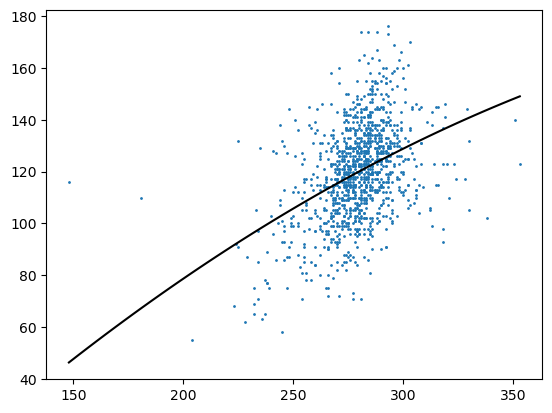

In [64]:
plt.scatter(df.gestation, df.bwt, s = 1)
X = np.zeros((50,2))
X[:,0] = np.linspace(df.gestation.min(), df.gestation.max())
X[:,1] = X[:,0]**2
plt.plot(X[:,0], lr.predict(X), '-k')
plt.show()

In [65]:
X

array([[   148.        ,  21904.        ],
       [   152.18367347,  23159.87047064],
       [   156.36734694,  24450.74718867],
       [   160.55102041,  25776.6301541 ],
       [   164.73469388,  27137.51936693],
       [   168.91836735,  28533.41482716],
       [   173.10204082,  29964.31653478],
       [   177.28571429,  31430.2244898 ],
       [   181.46938776,  32931.13869221],
       [   185.65306122,  34467.05914202],
       [   189.83673469,  36037.98583923],
       [   194.02040816,  37643.91878384],
       [   198.20408163,  39284.85797584],
       [   202.3877551 ,  40960.80341524],
       [   206.57142857,  42671.75510204],
       [   210.75510204,  44417.71303623],
       [   214.93877551,  46198.67721783],
       [   219.12244898,  48014.64764681],
       [   223.30612245,  49865.6243232 ],
       [   227.48979592,  51751.60724698],
       [   231.67346939,  53672.59641816],
       [   235.85714286,  55628.59183673],
       [   240.04081633,  57619.59350271],
       [   

In [66]:
np.linspace(df.gestation.min(), df.gestation.max()).shape


(50,)

In [67]:
df.iloc[:,1:-2]

,gestation,parity,age,height,weight
0,284,0,27,62,100
1,282,0,33,64,135
2,279,0,28,64,115
3,282,0,23,67,125
4,286,0,25,62,93
...,...,...,...,...,...
1169,275,1,27,60,100
1170,265,0,24,67,120
1171,291,0,30,65,150
1172,281,1,21,65,110


In [68]:
lr.fit(df.iloc[:,1:-2], df.bwt)

LinearRegression()

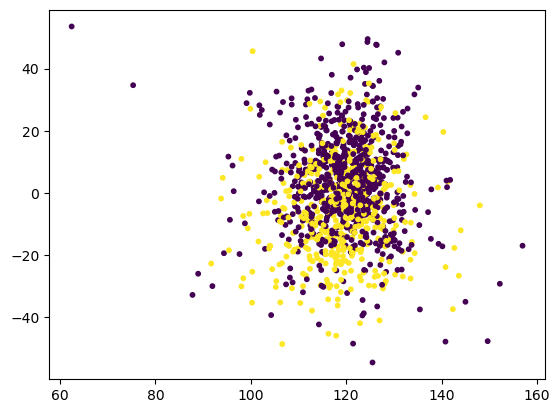

In [69]:
plt.scatter(lr.predict(df.iloc[:,1:-2]), df.bwt - lr.predict(df.iloc[:,1:-2]), s = 10,c = df.smoke)
plt.show()

In [70]:
df.weight.mean()

128.4787052810903

In [71]:
df.height.mean()

64.04940374787053

In [72]:
df

,bwt,gestation,parity,age,height,weight,smoke,g2
0,120,284,0,27,62,100,0,80656
1,113,282,0,33,64,135,0,79524
2,128,279,0,28,64,115,1,77841
3,108,282,0,23,67,125,1,79524
4,136,286,0,25,62,93,0,81796
...,...,...,...,...,...,...,...,...
1169,113,275,1,27,60,100,0,75625
1170,128,265,0,24,67,120,0,70225
1171,130,291,0,30,65,150,1,84681
1172,125,281,1,21,65,110,0,78961


In [75]:
features = df.columns[1:-1]
target = 'bwt'
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
ebm = ExplainableBoostingRegressor()
ebm.fit(df[features], df[target])

ExplainableBoostingRegressor()

In [76]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/6436720784/ -->

In [77]:
ebm_residuals = df.bwt - ebm.predict(df[features])

In [80]:
np.sqrt((ebm_residuals**2).mean())

14.53672148445564